In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [9]:
df['duration_minutes'] = df[df['type'] == 'Movie']['duration'].str.replace(' min','')
df['duration_minutes'] = pd.to_numeric(df['duration_minutes'])

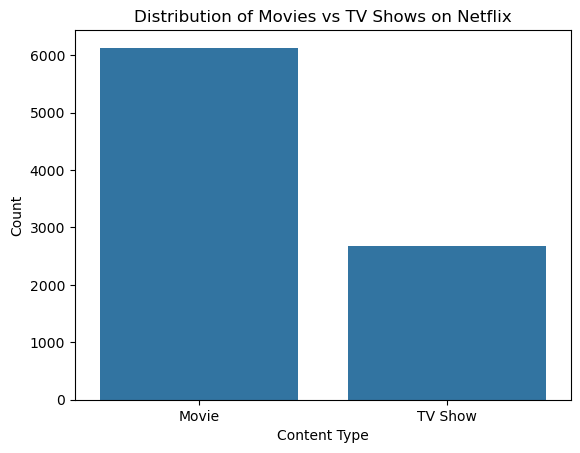

In [10]:
#plot1
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='type')
plt.title("Distribution of Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


In [11]:
#Netflix has a higher number of movies compared to TV shows,
#indicating a stronger focus on movie content.

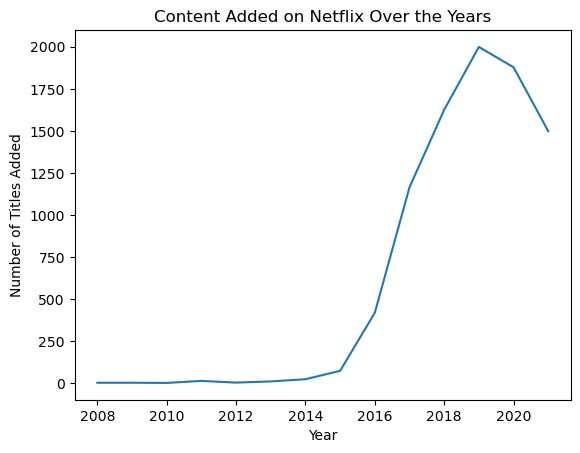

In [12]:
#plot2
yearly_content = df['year_added'].value_counts().sort_index()
sns.lineplot(x=yearly_content.index, y=yearly_content.values)
plt.title("Content Added on Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

In [13]:
#A sharp increase in content addition after 2016 shows Netflix’s aggressive global expansion strategy.

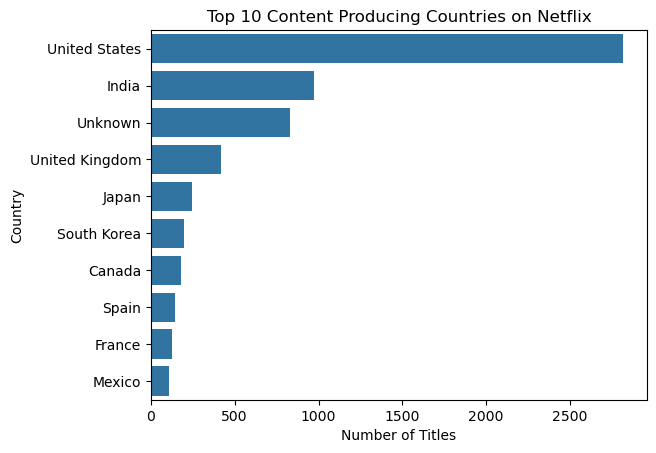

In [14]:
#PLot3
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

In [15]:
#The USA dominates Netflix content production, followed by India,
#highlighting focus on large entertainment markets.

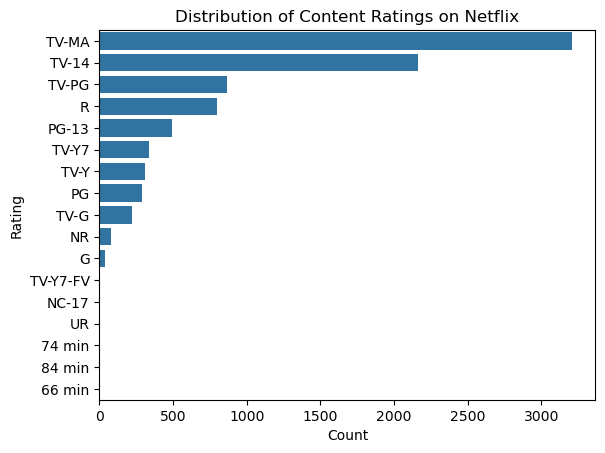

In [16]:
#plot4
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

In [17]:
#Most Netflix content is rated TV-MA, indicating a strong emphasis on mature audiences.

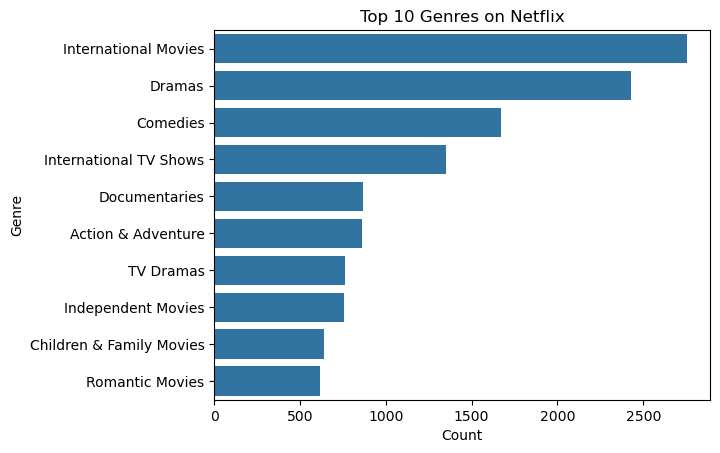

In [18]:
#plot5
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [19]:
#Dramas and International Movies are the most common genres,
#reflecting diverse global content.

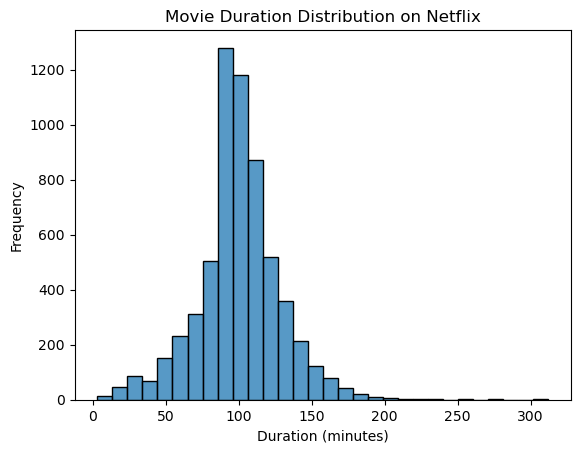

In [20]:
#plot6
movies = df[df['type'] == 'Movie']
sns.histplot(movies['duration_minutes'], bins=30)
plt.title("Movie Duration Distribution on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [21]:
#Most Netflix movies fall between 90 and 120 minutes,
#aligning with standard movie lengths.


In [22]:
#KEY INSIGHTS:
#1]Netflix has a significantly higher number of movies than TV shows, 
#indicating a stronger focus on shorter, standalone content.

#2]Content addition increased rapidly after 2016, reflecting Netflix’s aggressive global expansion strategy.

#3]The United States and India are the top content-producing countries, 
#showing Netflix’s focus on large and diverse markets.

#4]Most content is rated TV-MA, suggesting Netflix primarily targets mature audiences.

#5]Dramas and International Movies dominate the platform, highlighting global storytelling preferences.

#6]Most Netflix movies fall between 90–120 minutes, aligning with standard industry movie lengths.